In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
#Define the case and nb clusters 
case = "RTS24_mod1"
nbc = 10

In [33]:
#Read the relevant data 

#For net demand
df_dem_gen = pd.read_csv(f"D.Representative_days_based_on_RES_and_Demand/{case}/2.Par/oT_Data_Profiles_{case}.csv")
df_dem_gen["Net_demand"] = df_dem_gen["Demand"] -df_dem_gen["Solar"]-df_dem_gen["Wind"]-df_dem_gen["Hydro"]

#For line benefits 
df_LB = pd.read_csv(f"E.Representative_days_based_on_Line_Benefits_OptModel/{case}/3.Out/oT_LineBenefit_Data_{case}.csv")
df_LB.drop(df_LB.columns[0], axis=1, inplace=True)
df_LB["LB sum"] = df_LB.sum(axis = 1)
# df_LB = pd.read_csv(f"L.Cont_Investments_per_hour/{case}/3.Out/oT_Hourly_Investments_{case}.csv", header=[0,1,2,3])
# # replace the multiindex header with a single index header
# df_LB.columns = df_LB.columns.map('_'.join)
# # remove the last row
# df_LB = df_LB.iloc[:-1]
# df_LB.drop(df_LB.columns[0], axis=1, inplace=True)
# df_LB["LB sum"] = df_LB.sum(axis = 1)

#For the clusters 
df_clusters_1 = pd.read_csv(f"E.Representative_days_based_on_Line_Benefits_OptModel/{case}_ByStages_nc{nbc}/2.Par/oT_Data_Duration_{case}_ByStages_nc{nbc}.csv")
# df_clusters_1 = pd.read_csv(f"L.Cont_Investments_per_hour/{case}_ByStages_nc{nbc}/2.Par/oT_Data_Duration_{case}_ByStages_nc{nbc}.csv")
df_clusters_2 = pd.read_csv(f"D.Representative_days_based_on_RES_and_Demand/{case}_ByStages_nc{nbc}/2.Par/oT_Data_Duration_{case}_ByStages_nc{nbc}.csv")

cluster_names_1 = df_clusters_1["Stage"].unique()
cluster_names_2 = df_clusters_2["Stage"].unique()

color_map_1 = plt.cm.get_cmap('viridis', len(cluster_names_1))
category_colors_1 = {category: color_map_1(i) for i, category in enumerate(cluster_names_1)}

color_map_2 = plt.cm.get_cmap('viridis', len(cluster_names_2))
category_colors_2 = {category: color_map_1(i) for i, category in enumerate(cluster_names_2)}

df_colors = pd.DataFrame()
df_colors["LB"] = df_clusters_1['Stage'].map(category_colors_1)
df_colors["R&D"] = df_clusters_2['Stage'].map(category_colors_2)

C:\Users\u0138303\AppData\Local\Temp\ipykernel_20140\684019047.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map_1 = plt.cm.get_cmap('viridis', len(cluster_names_1))
C:\Users\u0138303\AppData\Local\Temp\ipykernel_20140\684019047.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map_2 = plt.cm.get_cmap('viridis', len(cluster_names_2))


In [20]:
print("Number of cluster names,", "LB: ",len(cluster_names_1),",","R&D: ",len(cluster_names_2))
print("Number of colors", "LB: ",len(df_colors["LB"].unique()),",","R&D: ",len(df_colors["R&D"].unique()))

Number of cluster names, LB:  10 , R&D:  10
Number of colors LB:  10 , R&D:  10


Text(0.5, 0, 'Net demand')

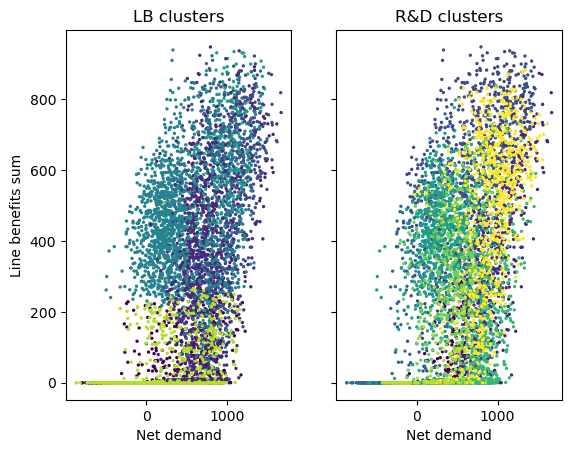

In [22]:
fig, axs = plt.subplots(1,2,sharey = True,sharex = True)
axs[0].scatter(x= df_dem_gen["Net_demand"],y=df_LB["LB sum"],c = df_colors["LB"],s = 2)
axs[1].scatter(x= df_dem_gen["Net_demand"],y=df_LB["LB sum"],c = df_colors["R&D"],s = 2)
#axs[1].scatter(x= df_dem_gen["Net_demand"],y=df_dem_gen["Net_demand"],c = df_colors["R&D"],s = 2)


axs[0].set_title("LB clusters")
axs[1].set_title("R&D clusters")
axs[0].set_ylabel("Line benefits sum")
axs[1].set_xlabel("Net demand")
axs[0].set_xlabel("Net demand")

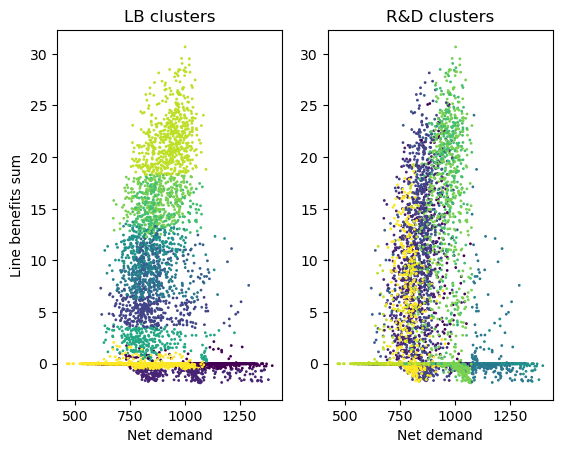

In [70]:
fig,axs = plt.subplots(1,2)
threshold = 40  # Adjust this threshold to your desired value
threshold_min = -25
# Filtering out data points above the threshold for the first plot
filtered_data_0 = df_LB[(df_LB["LB sum"] < threshold)&(df_LB["LB sum"] > threshold_min)]
axs[0].scatter(x=df_dem_gen.loc[filtered_data_0.index, "Net_demand"], y=filtered_data_0["LB sum"], c=df_colors.loc[filtered_data_0.index, "LB"],s =1)

# Filtering out data points above the threshold for the second plot
filtered_data_1 = df_LB[(df_LB["LB sum"] < threshold)&(df_LB["LB sum"] > threshold_min)]
axs[1].scatter(x=df_dem_gen.loc[filtered_data_1.index, "Net_demand"], y=filtered_data_1["LB sum"], c=df_colors.loc[filtered_data_1.index, "R&D"],s = 1)

axs[0].set_title("LB clusters")
axs[1].set_title("R&D clusters")
axs[0].set_ylabel("Line benefits sum")
axs[1].set_xlabel("Net demand")
axs[0].set_xlabel("Net demand")

plt.show()

Text(0.5, 1.0, 'R&D clusters')

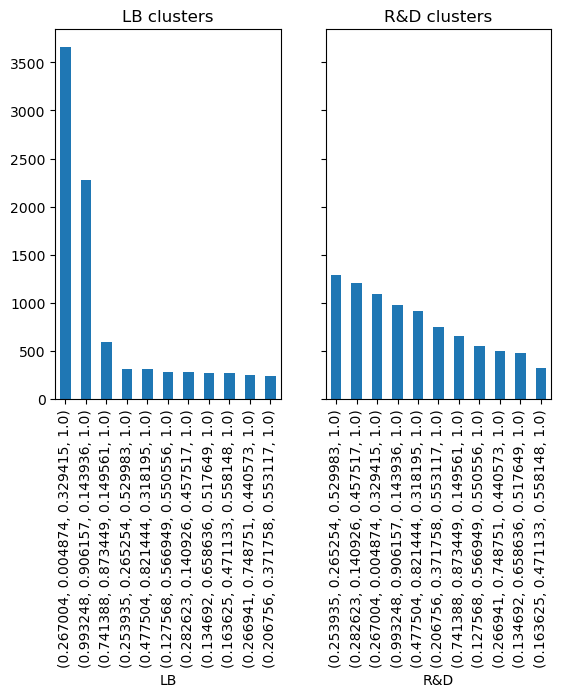

In [71]:
fig,axs = plt.subplots(1,2,sharey = True)
df_colors.LB.value_counts().plot(kind='bar',ax = axs[0])
df_colors["R&D"].value_counts().plot(kind='bar',ax = axs[1])
axs[0].set_title("LB clusters")
axs[1].set_title("R&D clusters")

## New way

In [315]:
import predictor_of_investment_helper_methods as hm
import pandas as pd
import matplotlib.pyplot as plt

In [323]:
case = "IEEE118_mod1"
nbc = 20

attribute_frames = dict()
attribute_frames["RD"] = hm.get_net_dem_FY(case)
attribute_frames["OC"] = pd.read_csv(f"B.Operation_cost/{case}/3.Out/oT_Result_GenerationCost_{case}.csv").drop(columns=["Period","Scenario"]).set_index("LoadLevel").sum(axis=1)
attribute_frames["LB"] = pd.read_csv(f"E.Representative_days_based_on_Line_Benefits_OptModel/{case}/3.Out/oT_LineBenefit_Data_{case}.csv").set_index("LoadLevel").sum(axis=1)
attribute_frames["CHI"]= pd.read_csv(f"L.Cont_Investments_per_hour/{case}/3.Out/oT_Hourly_Investments_{case}.csv",header = [4]).set_index("LoadLevel").sum(axis=1)
attribute_frames["DHI"]= pd.read_csv(f"K.Investments_per_hour/{case}/3.Out/oT_Hourly_Investments_{case}.csv",header = [4]).set_index("LoadLevel").sum(axis=1)


In [324]:
#Define dictionary of frames with clustering info 

clustering_frames = dict()
clustering_frames["RD"] =pd.read_csv(f"D.Representative_days_based_on_RES_and_Demand/{case}_ByStages_nc{nbc}/2.Par/oT_Data_Duration_{case}_ByStages_nc{nbc}.csv")
clustering_frames["OC"] =pd.read_csv(f"B.Operation_cost/{case}_ByStages_nc{nbc}/2.Par/oT_Data_Duration_{case}_ByStages_nc{nbc}.csv")
clustering_frames["LB"] =pd.read_csv(f"E.Representative_days_based_on_Line_Benefits_OptModel/{case}_ByStages_nc{nbc}/2.Par/oT_Data_Duration_{case}_ByStages_nc{nbc}.csv")
clustering_frames["CHI"] =pd.read_csv(f"L.Cont_Investments_per_hour/{case}_ByStages_nc{nbc}/2.Par/oT_Data_Duration_{case}_ByStages_nc{nbc}.csv")
clustering_frames["DHI"] =pd.read_csv(f"K.Investments_per_hour/{case}_ByStages_nc{nbc}/2.Par/oT_Data_Duration_{case}_ByStages_nc{nbc}.csv")


# clustering_frames["RD"]["center"] = clustering_frames["RD"]["Stage"].map(stage_to_repr_load_level_map).map(repr_load_level_to_value_map)

cluster_names = clustering_frames["RD"]["Stage"].unique()
color_map = plt.cm.get_cmap('viridis', len(cluster_names))
category_colors = {category: color_map(i) for i, category in enumerate(cluster_names)}


C:\Users\u0138303\AppData\Local\Temp\ipykernel_16880\1020230717.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(cluster_names))


In [325]:
attribute_frames["OC"]

LoadLevel
01-01 00:00:00+01:00      0.000000
01-01 01:00:00+01:00      0.000000
01-01 02:00:00+01:00      0.000000
01-01 03:00:00+01:00      0.000000
01-01 04:00:00+01:00      0.000000
                           ...    
12-30 19:00:00+01:00    259.985579
12-30 20:00:00+01:00    205.664705
12-30 21:00:00+01:00    147.024970
12-30 22:00:00+01:00     84.721128
12-30 23:00:00+01:00     16.835482
Length: 8736, dtype: float64

In [326]:
load_level_to_stage_map = dict()
stage_to_repr_load_level_map =dict()
repr_load_level_to_value_map =dict()
for cm in ["RD","CHI","OC","DHI","LB"]: 
    
    load_level_to_stage_map[cm] = clustering_frames[cm]["Stage"].to_dict()

    stage_to_repr_load_level_map[cm] = clustering_frames[cm][clustering_frames[cm]["Duration"] == 1].set_index("Stage")["LoadLevel"].to_dict()
    repr_load_level_to_value_map[cm] = {ll: attribute_frames[cm].loc[ll] for ll in stage_to_repr_load_level_map[cm].values()}
    centers = clustering_frames[cm]["center"] = clustering_frames[cm]["Stage"].map(stage_to_repr_load_level_map[cm]).map(repr_load_level_to_value_map[cm])
    min_val = centers.min()
    max_val = centers.max()
    clustering_frames[cm]["center"] = (centers - min_val) / (max_val - min_val)



In [328]:
clustering_frames["RD"]["color"] = clustering_frames["RD"]["Stage"].map(category_colors)
clustering_frames["LB"]["color"] = clustering_frames["LB"]["Stage"].map(category_colors)
clustering_frames["OC"]["color"] = clustering_frames["OC"]["Stage"].map(category_colors)
clustering_frames["CHI"]["color"] = clustering_frames["CHI"]["Stage"].map(category_colors)
clustering_frames["DHI"]["color"] = clustering_frames["DHI"]["Stage"].map(category_colors)

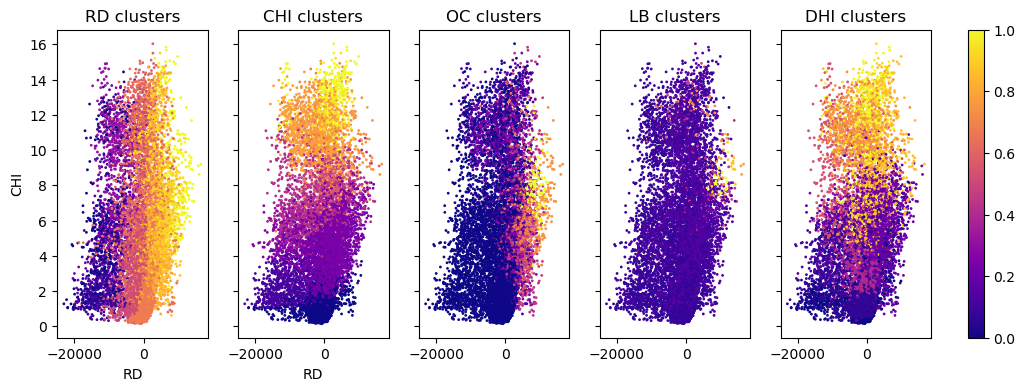

In [330]:
fig, axs = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(12, 4))

# Cluster names to loop through
cluster_names = [ "RD","CHI", "OC", "LB", "DHI"]
x = "RD"
y = "CHI"
s = 1

# Custom colormap
cmap = "plasma"  # You can try "coolwarm", "Set1", or others as well

# Loop over the cluster names to create scatter plots
for i, cluster in enumerate(cluster_names):
    scatter = axs[i].scatter(x=attribute_frames[x], y=attribute_frames[y], c=clustering_frames[cluster]["center"], s=s, cmap=cmap)
    axs[i].set_title(f"{cluster} clusters")

# Set common axis labels
axs[0].set_ylabel(y)
axs[0].set_xlabel(x)
axs[1].set_xlabel(x)

# Add a colorbar to the figure
fig.colorbar(scatter, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)

plt.show()



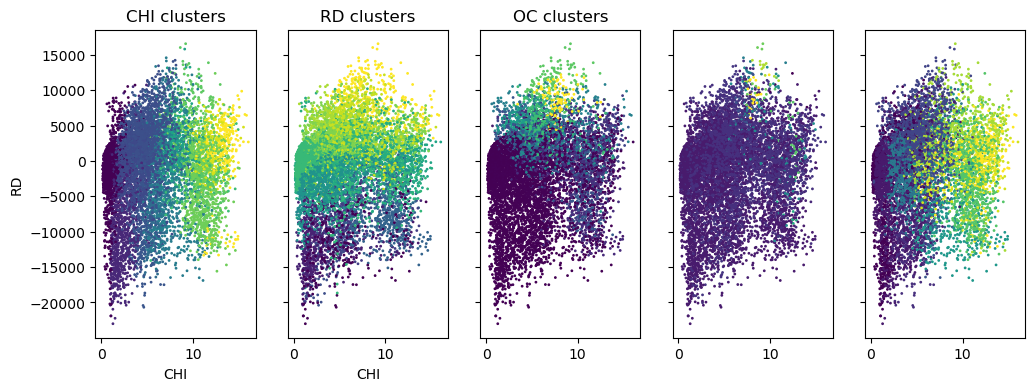

In [286]:
fig,axs = plt.subplots(1,5,sharex = True,sharey=True,figsize = (12,4))

x = "CHI"
y = "RD"
s = 1
axs[0].scatter(x=attribute_frames[x],y=attribute_frames[y],c=clustering_frames["CHI"]["center"],s =s)
axs[1].scatter(x=attribute_frames[x],y=attribute_frames[y],c=clustering_frames["RD"]["center"],s =s)
axs[2].scatter(x=attribute_frames[x],y=attribute_frames[y],c=clustering_frames["OC"]["center"],s =s)
axs[3].scatter(x=attribute_frames[x],y=attribute_frames[y],c=clustering_frames["LB"]["center"],s =s)
axs[4].scatter(x=attribute_frames[x],y=attribute_frames[y],c=clustering_frames["DHI"]["center"],s =s)


axs[0].set_title("CHI clusters")
axs[1].set_title("RD clusters")
axs[2].set_title("OC clusters")
axs[0].set_ylabel(y)
axs[1].set_xlabel(x)
axs[0].set_xlabel(x)

plt.show()

Text(0.5, 1.0, 'R&D clusters')

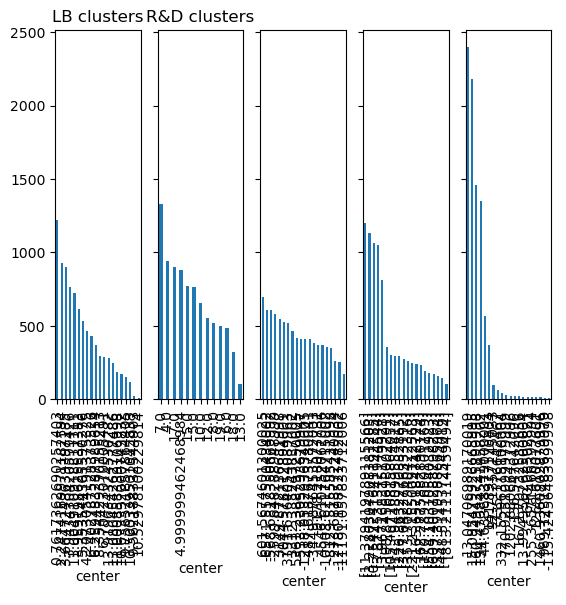

In [288]:
fig,axs = plt.subplots(1,5,sharey = True)


clustering_frames["CHI"]["center"].value_counts().plot(kind='bar',ax = axs[0])
clustering_frames["DHI"]["center"].value_counts().plot(kind='bar',ax = axs[1])
clustering_frames["RD"]["center"].value_counts().plot(kind='bar',ax = axs[2])
clustering_frames["OC"]["center"].value_counts().plot(kind='bar',ax = axs[3])
clustering_frames["LB"]["center"].value_counts().plot(kind='bar',ax = axs[4])

axs[0].set_title("LB clusters")
axs[1].set_title("R&D clusters")